Twitter Sentiment Analysis - Using Deep Learning

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://www.kaggle.com/datasets/kazanova/sentiment140
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [ ]:
#What is WordNet in NLP?
#WordNet: A Lexical Taxonomy of English Words | by Lowri ...
#WordNet is a large lexical database of English words. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms called 'synsets', each expressing a distinct concept.
#Synsets are interlinked using conceptual-semantic and lexical relations such as hyponymy and antonymy.

1. Importing and Discovering the Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.stem import PorterStemmer
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from nltk.stem import SnowballStemmer
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#What is WordNet in NLP?
#WordNet: A Lexical Taxonomy of English Words | by Lowri ...
#WordNet is a large lexical database of English words. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms called 'synsets', each expressing a distinct concept.
#Synsets are interlinked using conceptual-semantic and lexical relations such as hyponymy and antonymy.

In [ ]:
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin')
df.columns = ["label", "time", "date", "query", "username", "text"]
df


,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1123177,4,1974447439,Sat May 30 13:09:20 PDT 2009,NO_QUERY,iPrecious,@morkargo Very true
1123178,4,1974447468,Sat May 30 13:09:20 PDT 2009,NO_QUERY,KatyBasey,"@laubow_ oh yeah I remember that! I am so, soo..."
1123179,4,1974447473,Sat May 30 13:09:20 PDT 2009,NO_QUERY,shaunarawrr_x,@Boon565 well you obviously have the shitest t...
1123180,4,1974447501,Sat May 30 13:09:20 PDT 2009,NO_QUERY,info4every1,@Writer993 I let @Bravelad answers that one ...


In [ ]:
df

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1123177,4,1974447439,Sat May 30 13:09:20 PDT 2009,NO_QUERY,iPrecious,@morkargo Very true
1123178,4,1974447468,Sat May 30 13:09:20 PDT 2009,NO_QUERY,KatyBasey,"@laubow_ oh yeah I remember that! I am so, soo..."
1123179,4,1974447473,Sat May 30 13:09:20 PDT 2009,NO_QUERY,shaunarawrr_x,@Boon565 well you obviously have the shitest t...
1123180,4,1974447501,Sat May 30 13:09:20 PDT 2009,NO_QUERY,info4every1,@Writer993 I let @Bravelad answers that one ...


2. Dataset Preprocessing & Data Reading Using Pandas.

In [ ]:
# Checking the data's output balance
# The label '4' denotes positive sentiment and '0' denotes negative sentiment
df['label'].value_counts()

0    799999
4    323183
Name: label, dtype: int64

In [ ]:
# Ommiting every column except for the text and the label, as we won't need any of the other information
df1 = df[['label', 'text']]
df1.head()

,label,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
# Separating positive and negative rows
df_pos = df[df['label'] == 4]
df_neg = df[df['label'] == 0]
print(len(df_pos), len(df_neg))

323183 799999


In [ ]:
# Only retaining 1/4th of our data from each output group
# Feel free to alter the dividing factor depending on your workspace
# 1/64 is a good place to start if you're unsure about your machine's power
df_pos = df_pos.iloc[:int(len(df_pos)/4)]
df_neg = df_neg.iloc[:int(len(df_neg)/4)]
print(len(df_pos), len(df_neg))

80795 199999


3. Text Preprocessing

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)
print('no of stop words',len(stop_words))

{'am', 'himself', 'aren', 'that', 'her', 'off', 'too', "don't", 'all', 'he', 'we', 'as', 'have', "couldn't", 'this', "you'd", 'ain', "wasn't", 'yourselves', 'yours', 'a', 'each', 'more', 'because', "haven't", 'i', 'if', 'when', 'on', 'by', 'doesn', 'then', 'should', 'same', 'doing', 'his', 'an', 'its', 'does', 'at', 'll', "you've", 'the', 'any', 'about', 'with', 'me', 'him', "it's", 'she', "should've", 'won', "mustn't", 'having', 'and', 'my', "she's", 'it', 'or', 'being', 'for', 'm', 'out', 'through', 'only', 'above', 'both', 're', 'again', 'hadn', 'once', 'their', 'weren', 'can', 'don', 'them', 'over', 'you', 'our', 'nor', 'further', 'until', 'd', 'what', 'yourself', 'other', 'such', 'under', 'where', 'were', 'wasn', 'couldn', "aren't", 'those', 'y', 'between', "you'll", "mightn't", 'very', 'mustn', 'herself', 'ours', 'down', 'do', 'but', 'these', 'isn', 'hers', 've', 'from', 'in', "isn't", 'against', 'so', 'haven', 'ourselves', 'during', "needn't", 'had', 'needn', 'has', 'of', 'might

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["text"] = df["text"].astype(str)
def toLower(text):
    return text.lower()

df["text"] = df["text"].apply(toLower)
df.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@kwesidei not the whole crew


In [ ]:
nltk.download('punkt')
def data_preprocessing(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.text = df['text'].apply(data_preprocessing)

In [ ]:
df.text.head(10)

0    upset cant update facebook texting might cry r...
1    kenichan dived many times ball managed save 50...
2                     whole body feels itchy like fire
3             nationwideclass behaving im mad cant see
4                                  kwesidei whole crew
5                                             need hug
6    loltrish hey long time see yes rains bit bit l...
7                                 tatiana_k nope didnt
8                                   twittera que muera
9                      spring break plain city snowing
Name: text, dtype: object

In [ ]:
stemmer = PorterStemmer()
def data_preprocessing_stem(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stem_words = [stemmer.stem(w) for w in filtered_text]
    return " ".join(stem_words)

In [ ]:
df.text = df['text'].apply(data_preprocessing_stem)

In [ ]:
df.text.head(5)

0    upset cant updat facebook text might cri resul...
1    kenichan dive mani time ball manag save 50 res...
2                      whole bodi feel itchi like fire
3                nationwideclass behav im mad cant see
4                                  kwesidei whole crew
Name: text, dtype: object

In [ ]:
# Lets drop the duplicate values

df = df.drop_duplicates('text')

In [ ]:
df.text

0          upset cant updat facebook text might cri resul...
1          kenichan dive mani time ball manag save 50 res...
2                            whole bodi feel itchi like fire
3                      nationwideclass behav im mad cant see
4                                        kwesidei whole crew
                                 ...                        
1123177                                        morkargo true
1123178                   laubow_ oh yeah rememb soooo proud
1123179              boon565 well obvious shitest tast music
1123180    riter993 let bravelad answer one sinc origin b...
1123181                                                  nan
Name: text, Length: 1087557, dtype: object

In [ ]:
print(df['text'].iloc[0],'\n')
print(df['text'].iloc[1],'\n')
print(df['text'].iloc[2],'\n')

upset cant updat facebook text might cri result school today also blah 

kenichan dive mani time ball manag save 50 rest go bound 

whole bodi feel itchi like fire 



4. Exploratory Data Analysis using WordCloud.

In [ ]:
import plotly.express as px
fig = px.pie(df, names='label', title ='Pie chart of different sentiments of tweets')
fig.show()

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.label = df.label.apply(lambda x: label_decoder(x))
df.head()

<ipython-input-302-72815473027d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,label,time,date,query,username,text
0,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
1,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save 50 res...
2,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
3,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav im mad cant see
4,Negative,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew


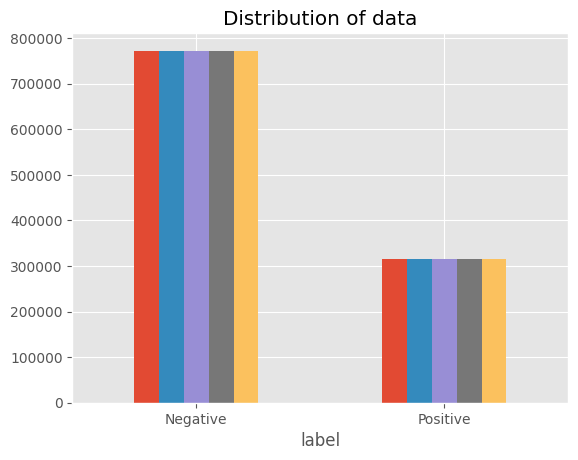

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['label'])

Text(0.5, 1.0, 'Sentiment Data Distribution')

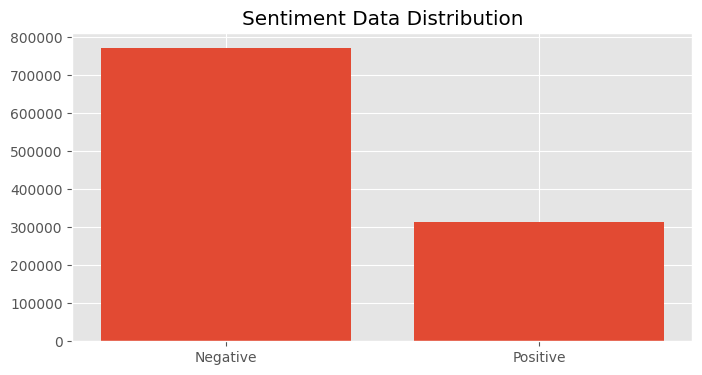

In [ ]:
val_count = df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,label,time,date,query,username,text
793412,Negative,2326621007,Thu Jun 25 07:17:16 PDT 2009,NO_QUERY,Elmogyrl,dont think cut 95 need somebodi hous wife acti...
385329,Negative,2053581414,Sat Jun 06 05:02:54 PDT 2009,NO_QUERY,Paolinazola,hey read answer hey kind ooooo happi
593458,Negative,2218243269,Wed Jun 17 22:08:01 PDT 2009,NO_QUERY,catdecember,54 athlet win sad still ethier yay
581155,Negative,2214196539,Wed Jun 17 16:24:11 PDT 2009,NO_QUERY,Brandibedinger,got new phone sigh heck manag throw phone cup ...
906185,Positive,1695312721,Mon May 04 05:48:58 PDT 2009,NO_QUERY,irishspy,dutchreaganit
254359,Negative,1984216975,Sun May 31 14:40:14 PDT 2009,NO_QUERY,Tallulahsaskia,sunday sunburntand got scienc alevel tommorown...
1067616,Positive,1965527608,Fri May 29 16:04:41 PDT 2009,NO_QUERY,gminks,drink w brianrosenth stu poillypearson amp mr ...
847595,Positive,1564623873,Mon Apr 20 04:18:46 PDT 2009,NO_QUERY,rightmove,amyk thank feedback alway nice know user think...
107785,Negative,1824063226,Sat May 16 23:54:56 PDT 2009,NO_QUERY,Jessica_Tate,pass eff much parti
308676,Negative,2000730989,Mon Jun 01 22:48:59 PDT 2009,NO_QUERY,webmaster_paul,anothera lmao post thread recent


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))

<ipython-input-309-8fcf10b40797>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



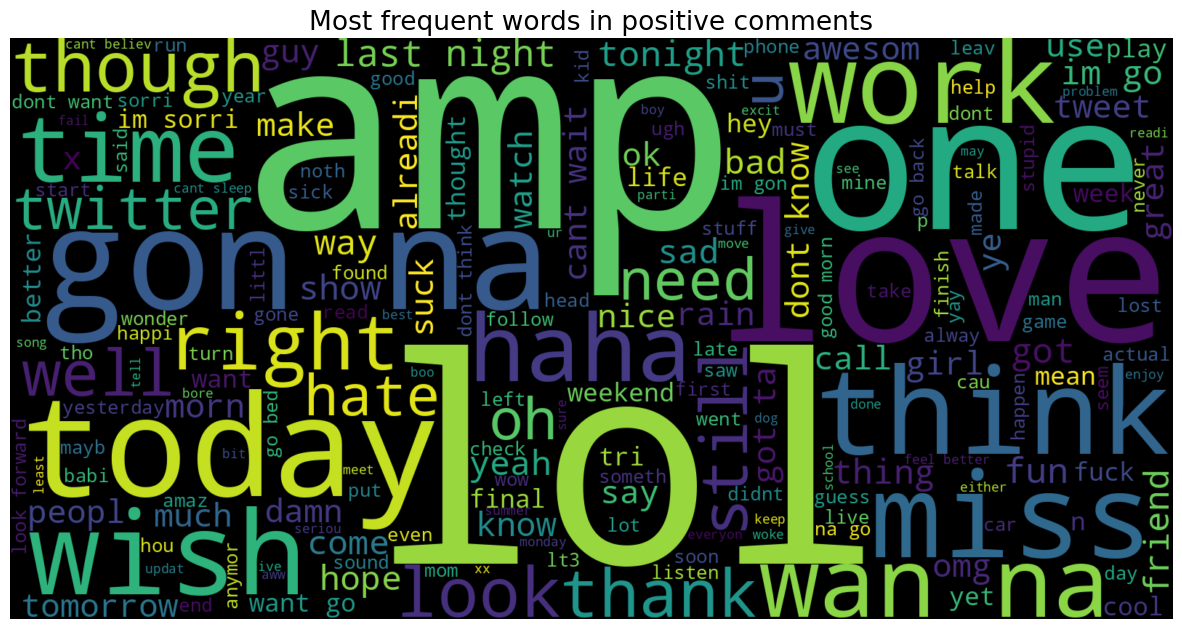

In [ ]:
text = ' '.join([word for word in df['text']])
plt.figure(figsize = (15,15), facecolor='None')
# Word cloud object for generating and drawing
wordcloud = WordCloud(max_words=200, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Positive comments', fontsize=19)
plt.show()

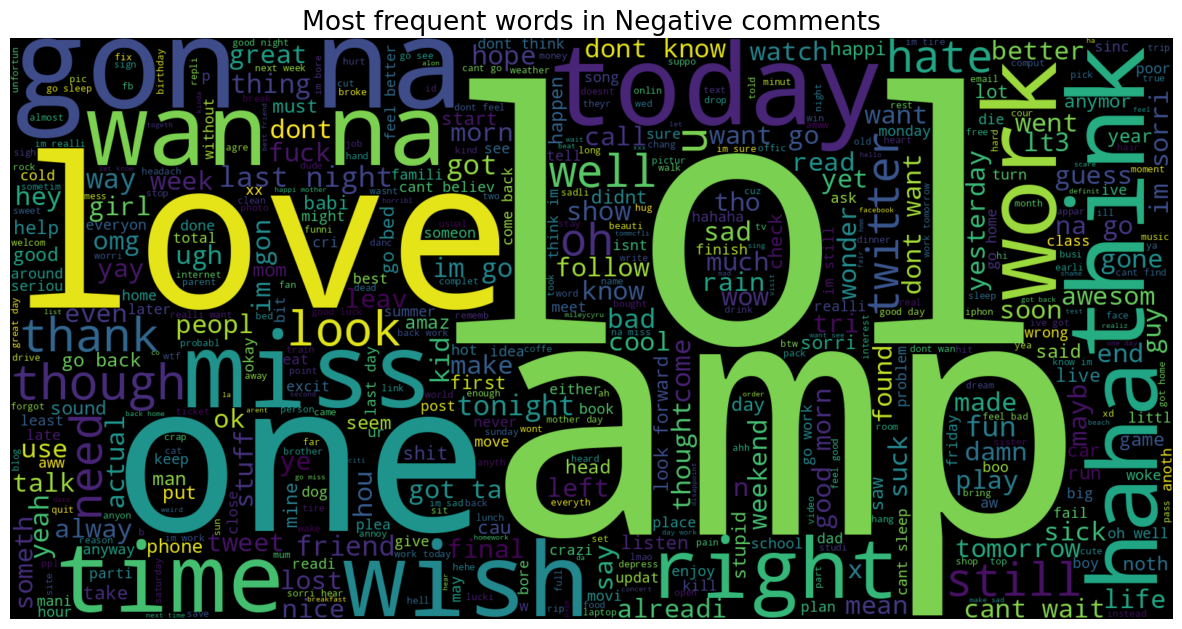

In [ ]:
text = ' '.join([word for word in df['text']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative comments', fontsize=19)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['text'])

In [ ]:
feature_names = vect.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features: 3919812

First 20 features: 
['00' '00 00' '00 10' '00 access' '00 amp' '00 awww' '00 cartoon'
 '00 draw' '00 except' '00 follow' '00 girl' '00 good' '00 graduat'
 '00 heart' '00 hurt' '00 im' '00 kill' '00 kiss' '00 lightn' '00 oh']


6.Train and Test Split

In [ ]:
X = df['text']
Y = df['label']
X = vect.transform(X)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.2, random_state =42)

In [ ]:
print('Size of Xtrain:',(xtrain.shape))
print('Size of ytrain:',(ytrain.shape))
print('Size of Xtest:',(xtest.shape))
print('Size of ytest:',(ytest.shape))

Size of Xtrain: (870045, 3919812)
Size of ytrain: (870045,)
Size of Xtest: (217512, 3919812)
Size of ytest: (217512,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [ ]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
logreg_pred = logreg.predict(xtest)
logreg_acc =accuracy_score(logreg_pred,ytest)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Test accuracy : 81.75%


In [ ]:
print(confusion_matrix(ytest, logreg_pred))
print('\n')
print(classification_report(ytest, logreg_pred))

[[140230  14315]
 [ 25373  37594]]


              precision    recall  f1-score   support

    Negative       0.85      0.91      0.88    154545
    Positive       0.72      0.60      0.65     62967

    accuracy                           0.82    217512
   macro avg       0.79      0.75      0.77    217512
weighted avg       0.81      0.82      0.81    217512



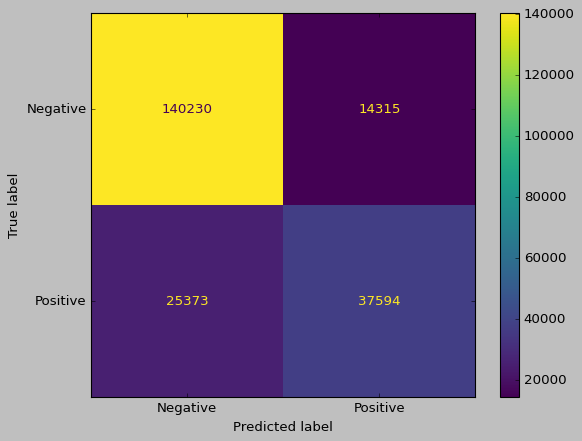

In [ ]:
style.use('classic')
cm = confusion_matrix(ytest, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(xtest)
svc_acc = accuracy_score(svc_pred,ytest)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 80.93%


In [ ]:
print(confusion_matrix(ytest,svc_pred))
print('\n')
print(classification_report(ytest,svc_pred))

[[137378  17167]
 [ 24303  38664]]


              precision    recall  f1-score   support

    Negative       0.85      0.89      0.87    154545
    Positive       0.69      0.61      0.65     62967

    accuracy                           0.81    217512
   macro avg       0.77      0.75      0.76    217512
weighted avg       0.80      0.81      0.81    217512



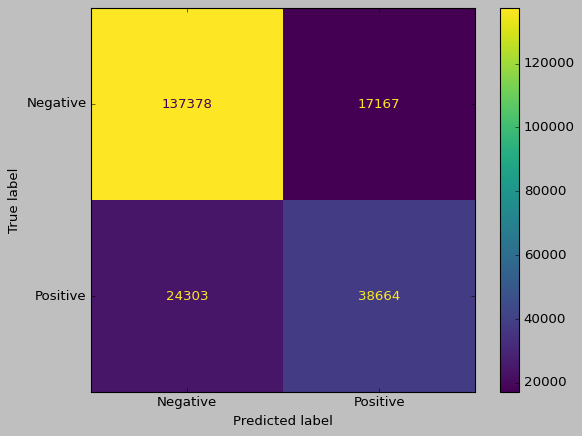

In [ ]:
style.use('classic')
cm = confusion_matrix(ytest, svc_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()